In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

dis1_df = pd.read_csv('Desktop/MSU_Data_bootcamp/ML_project/training.csv')
dis2_df = pd.read_csv('Desktop/MSU_Data_bootcamp/ML_project/testing.csv')

dis1_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [2]:
# concatenate the two dataframes

full_set = [dis1_df, dis2_df]

full_df = pd.concat(full_set)

full_df = full_df.drop(columns = ['Unnamed: 133'])

full_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [3]:
#describe the data

full_df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,...,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,0.021967,...,0.021967,0.021967,0.021967,0.023378,0.023176,0.023176,0.023176,0.023176,0.023378,0.023176
std,0.344986,0.366658,0.146590,0.207639,0.146590,0.368702,0.346041,0.207639,0.207639,0.146590,...,0.146590,0.146590,0.146590,0.151115,0.150478,0.150478,0.150478,0.150478,0.151115,0.150478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#The data is all boolean with respect to symptoms.
#I am going to try to use groupby to visualize this a little bit

ave_symps = full_df.groupby('prognosis').median()

print(f'there are {len(ave_symps)} diseases represented in the data')
print(f'there are 132 symptoms')
ave_symps.head(20)

there are 41 diseases represented in the data
there are 132 symptoms


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIDS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acne,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
Alcoholic hepatitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Allergy,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arthritis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bronchial Asthma,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cervical spondylosis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chicken pox,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#writing this out to csv in order to have a better look at what it looks like in table form

#ave_symps.to_csv('Desktop/MSU_Data_bootcamp/ML_project/ave_symptoms.csv')

In [6]:
#similar but with means, so that I can see variability in the symptoms

mean_symps = full_df.groupby('prognosis').mean()
#mean_symps.to_csv('Desktop/MSU_Data_bootcamp/ML_project/mean_symptoms.csv')

When the mean groupby table was examined, the decimal values were either very high or very low, indicating that the diseases are not highly variable like Covid (for instance) which show up as diarrhea and a headache in one person, and shortness of breath and high fever in another. There is variability in the data, though. 



In [7]:
#train/test split

y = full_df[['prognosis']].copy()

#this step was inserted because of a warning given by the algorythm - it didn't like that y was a column vector
y = np.ravel(y)

X = full_df.drop(columns = ['prognosis'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


In [8]:
#apply a linear fit model to the training data
diags = SVC(kernel='linear')

diags.fit(X_train, y_train)


SVC(kernel='linear')

In [9]:
diagnoses = diags.predict(X_test)

diagnoses

array(['Heart attack', 'Psoriasis', 'Osteoarthristis', ...,
       'Dimorphic hemmorhoids(piles)', 'Hypothyroidism', 'Typhoid'],
      dtype=object)

In [10]:
#classification reporting and metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, diagnoses))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        36
                                   Acne       1.00      1.00      1.00        34
                    Alcoholic hepatitis       1.00      1.00      1.00        34
                                Allergy       1.00      1.00      1.00        27
                              Arthritis       1.00      1.00      1.00        32
                       Bronchial Asthma       1.00      1.00      1.00        36
                   Cervical spondylosis       1.00      1.00      1.00        30
                            Chicken pox       1.00      1.00      1.00        29
                    Chronic cholestasis       1.00      1.00      1.00        28
                            Common Cold       1.00      1.00      1.00        29
                           

The classification report shows that the algorythm was able to predict the diseases flawlessly. This is kind of interesting, but I have to wonder about the realism of the data. An interesting next step might be to assemble a few case studies where we know what the illness is, transform the symptoms into vectors we could feed the model, and then see if it accurately diagnoses the illnesses in those cases. 

Look into making a graph with frequency of symptoms. 
Look into visualization strategies for binary data. 
Meeting 7pm on Monday. 

In [15]:
#making a transpose dataframe to look at symptom frequency

trans_df = mean_symps.transpose()

trans_df.head()


prognosis,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
itching,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.950413,0.950413,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
skin_rash,0.0,0.0,0.950413,0.0,0.000000,0.0,0.0,0.0,0.950413,0.000000,...,0.0,0.0,0.0,0.0,0.950413,0.0,0.0,0.0,0.0,0.0
nodal_skin_eruptions,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
continuous_sneezing,0.0,0.0,0.000000,0.0,0.900826,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
shivering,0.0,0.0,0.000000,0.0,0.900826,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [17]:
mean_symps.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIDS,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acne,0.0,0.950413,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.900826,0.900826,0.900826,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alcoholic hepatitis,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allergy,0.0,0.000000,0.0,0.900826,0.900826,0.900826,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Sum over a column

itch_freq = mean_symps['itching'].sum()

print(f'itching appears in about {itch_freq} illnesses')

itching appears in about 5.653705459964774 illnesses


In [25]:
#iterate through columns summing and adding the values to a dictionary

dis_counts = {}

#iteration to construct disease counts dictionary
#https://www.geeksforgeeks.org/loop-or-iterate-over-all-or-certain-columns-of-a-dataframe-in-python-pandas/

for (columnName, columnData) in mean_symps.iteritems():
    new_dat = {columnName: columnData.sum()}
    dis_counts.update(new_dat)
    print(f'{new_dat} added to dictionary')
    

symp_freqs = pd.DataFrame(dis_counts, index = [0])

symp_freqs.head()


{'itching': 5.653705459964774} added to dictionary
{'skin_rash': 6.554531906245766} added to dictionary
{'nodal_skin_eruptions': 0.8934426229508197} added to dictionary
{'continuous_sneezing': 1.8512396694214877} added to dictionary
{'shivering': 0.9008264462809917} added to dictionary
{'chills': 6.652892561983471} added to dictionary
{'joint_pain': 5.702479338842975} added to dictionary
{'stomach_pain': 1.8512396694214877} added to dictionary
{'acidity': 1.8512396694214877} added to dictionary
{'ulcers_on_tongue': 0.9008264462809917} added to dictionary
{'muscle_wasting': 0.9008264462809917} added to dictionary
{'vomiting': 15.958677685950414} added to dictionary
{'burning_micturition': 1.8016528925619835} added to dictionary
{'spotting_ urination': 0.9008264462809917} added to dictionary
{'fatigue': 16.107438016528928} added to dictionary
{'weight_gain': 0.9504132231404959} added to dictionary
{'anxiety': 0.9504132231404959} added to dictionary
{'cold_hands_and_feets': 0.950413223140

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,5.653705,6.554532,0.893443,1.85124,0.900826,6.652893,5.702479,1.85124,1.85124,0.900826,...,0.900826,0.900826,0.900826,0.95861,0.950413,0.950413,0.950413,0.950413,0.95861,0.950413


In [53]:
symp_freqs_t = symp_freqs.T

symp_freqs_t = symp_freqs_t.sort_values(by = [0], ascending = False)

symp_freqs_t.head(20)


,0
fatigue,16.107438
vomiting,15.958678
high_fever,11.355372
loss_of_appetite,9.603306
nausea,9.553719
headache,9.454545
abdominal_pain,8.603306
yellowish_skin,7.603306
yellowing_of_eyes,6.801653
chills,6.652893


In [54]:
symp_freqs_t.tail(20)

,0
scurring,0.900826
spotting_ urination,0.900826
muscle_wasting,0.900826
blackheads,0.900826
ulcers_on_tongue,0.900826
pus_filled_pimples,0.900826
shivering,0.900826
weakness_in_limbs,0.900826
patches_in_throat,0.900826
sunken_eyes,0.900826


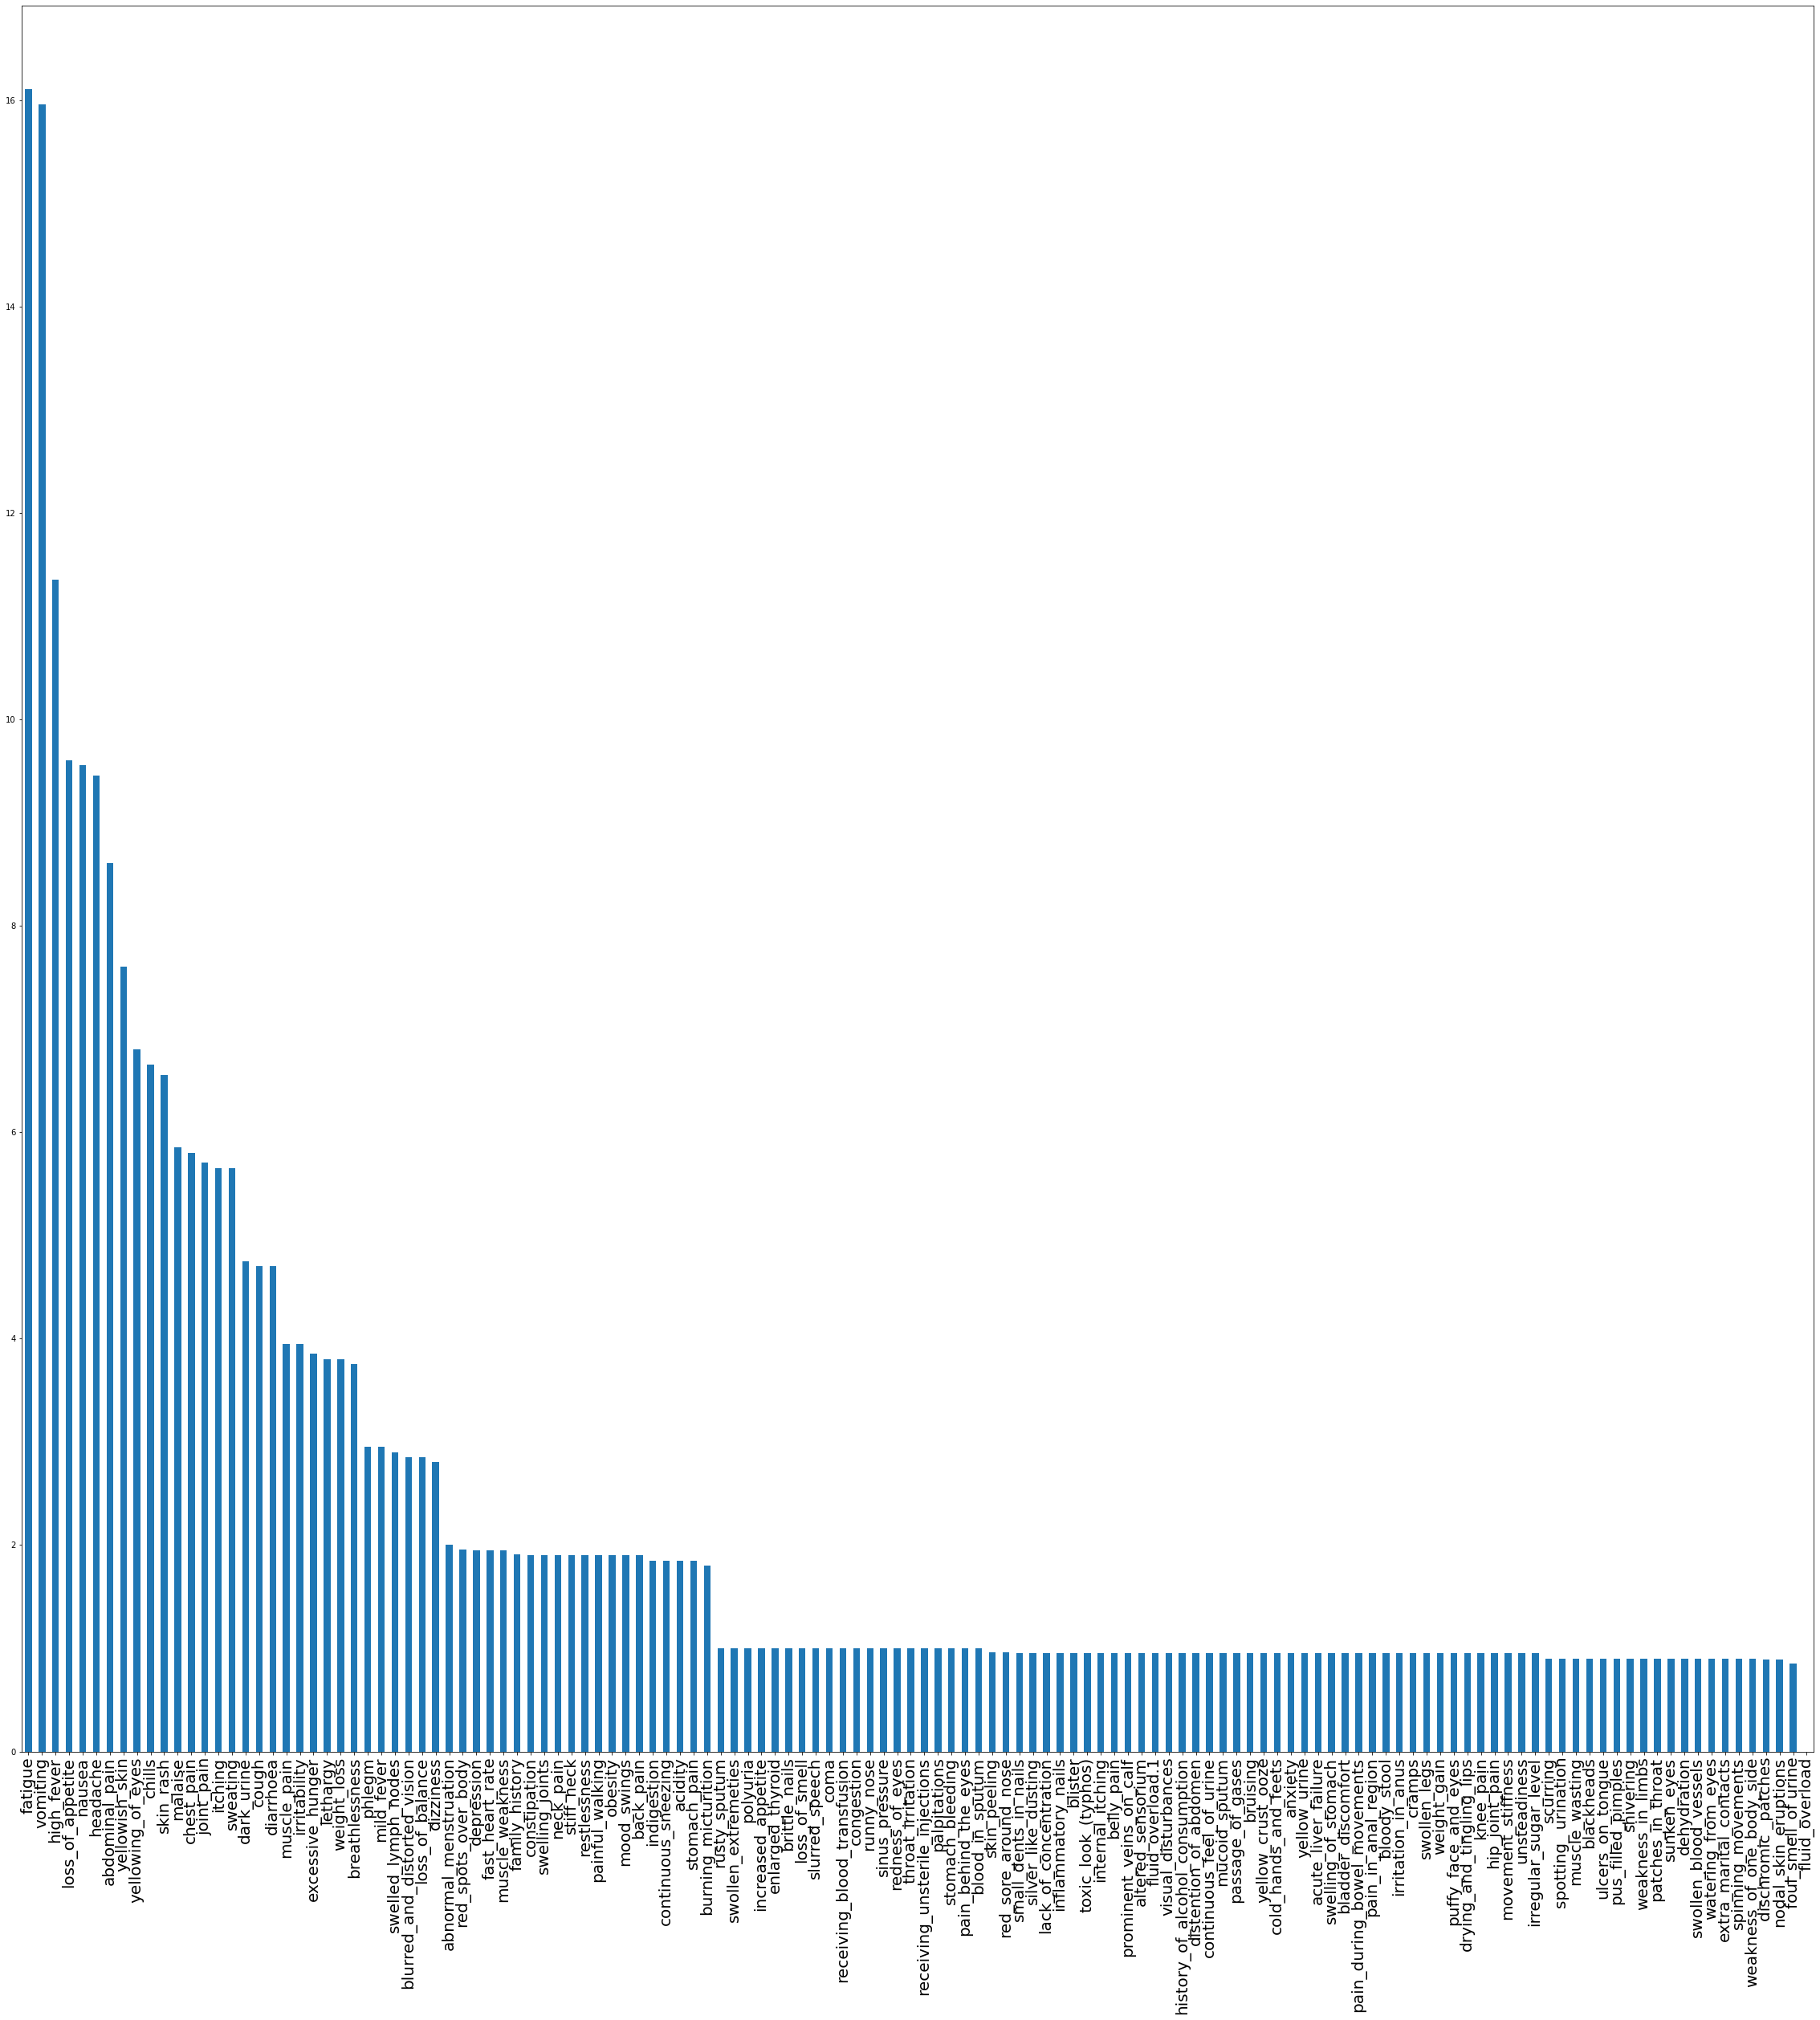

In [50]:
symp_freqs_t.plot.bar(legend = False, figsize = (40, 40))
plt.rc('xtick', labelsize = 30)
plt.rc('ytick', labelsize = 30)
plt.savefig('desktop/symptom_freq.png')
plt.show()

In [52]:
#how many illnesses does the average symptom show up in?

ave_ills = symp_freqs_t[0].mean()

print(f'the averge symptom shows up in {ave_ills} illnesses')

the averge symptom shows up in 2.3147618988968404 illnesses


In [55]:
#figure out the average number of symptoms per illness

#how many symptoms does AIDS have?

aids_s = trans_df['AIDS'].sum()

print(f'AIDS shows about {aids_s} symptoms')

AIDS shows about 3.652892561983471 symptoms


In [57]:
# compile a dictionary with symptom counts for each illness

symp_counts = {}

for (columnName, columnData) in trans_df.iteritems():
    new_dat2 = {columnName: columnData.sum()}
    symp_counts.update(new_dat2)
    print(f'{new_dat2} added to dictionary')
    

ill_freqs = pd.DataFrame(symp_counts, index = [0])

ill_freqs.head()



{'(vertigo) Paroymsal  Positional Vertigo': 5.652892561983471} added to dictionary
{'AIDS': 3.652892561983471} added to dictionary
{'Acne': 3.6528925619834713} added to dictionary
{'Alcoholic hepatitis': 6.652892561983471} added to dictionary
{'Allergy': 3.603305785123967} added to dictionary
{'Arthritis': 4.75206611570248} added to dictionary
{'Bronchial Asthma': 5.603305785123967} added to dictionary
{'Cervical spondylosis': 4.652892561983471} added to dictionary
{'Chicken pox': 10.553719008264464} added to dictionary
{'Chronic cholestasis': 6.652892561983471} added to dictionary
{'Common Cold': 16.60330578512397} added to dictionary
{'Dengue': 13.553719008264464} added to dictionary
{'Diabetes ': 9.603305785123968} added to dictionary
{'Dimorphic hemmorhoids(piles)': 4.75206611570248} added to dictionary
{'Drug Reaction': 4.553719008264463} added to dictionary
{'Fungal infection': 3.6229508196721314} added to dictionary
{'GERD': 5.553719008264463} added to dictionary
{'Gastroenterit

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,5.652893,3.652893,3.652893,6.652893,3.603306,4.752066,5.603306,4.652893,10.553719,6.652893,...,5.702479,3.652893,5.603306,10.603306,5.702479,15.603306,10.603306,3.652893,6.603306,10.603306


In [62]:
symps_per_ill = ill_freqs.T

symps_per_ill = symps_per_ill.sort_values(by = [0], ascending = False)

symps_per_ill.head(20)

,0
Common Cold,16.603306
Tuberculosis,15.603306
Dengue,13.553719
Hypothyroidism,12.603306
Hepatitis E,12.603306
Hepatitis B,11.603306
Hypoglycemia,11.603306
Pneumonia,10.603306
Hyperthyroidism,10.603306
hepatitis A,10.603306


In [63]:
symps_per_ill.tail(20)

,0
Psoriasis,5.702479
(vertigo) Paroymsal Positional Vertigo,5.652893
Hepatitis C,5.652893
Bronchial Asthma,5.603306
Peptic ulcer diseae,5.603306
GERD,5.553719
Dimorphic hemmorhoids(piles),4.752066
Arthritis,4.752066
Impetigo,4.652893
Cervical spondylosis,4.652893


In [65]:
#how many symptoms does the average illness show?

ave_symps = symps_per_ill[0].mean()

print(f'The average illness in the data set presents {ave_symps} symptoms')

The average illness in the data set presents 7.45240416230202 symptoms


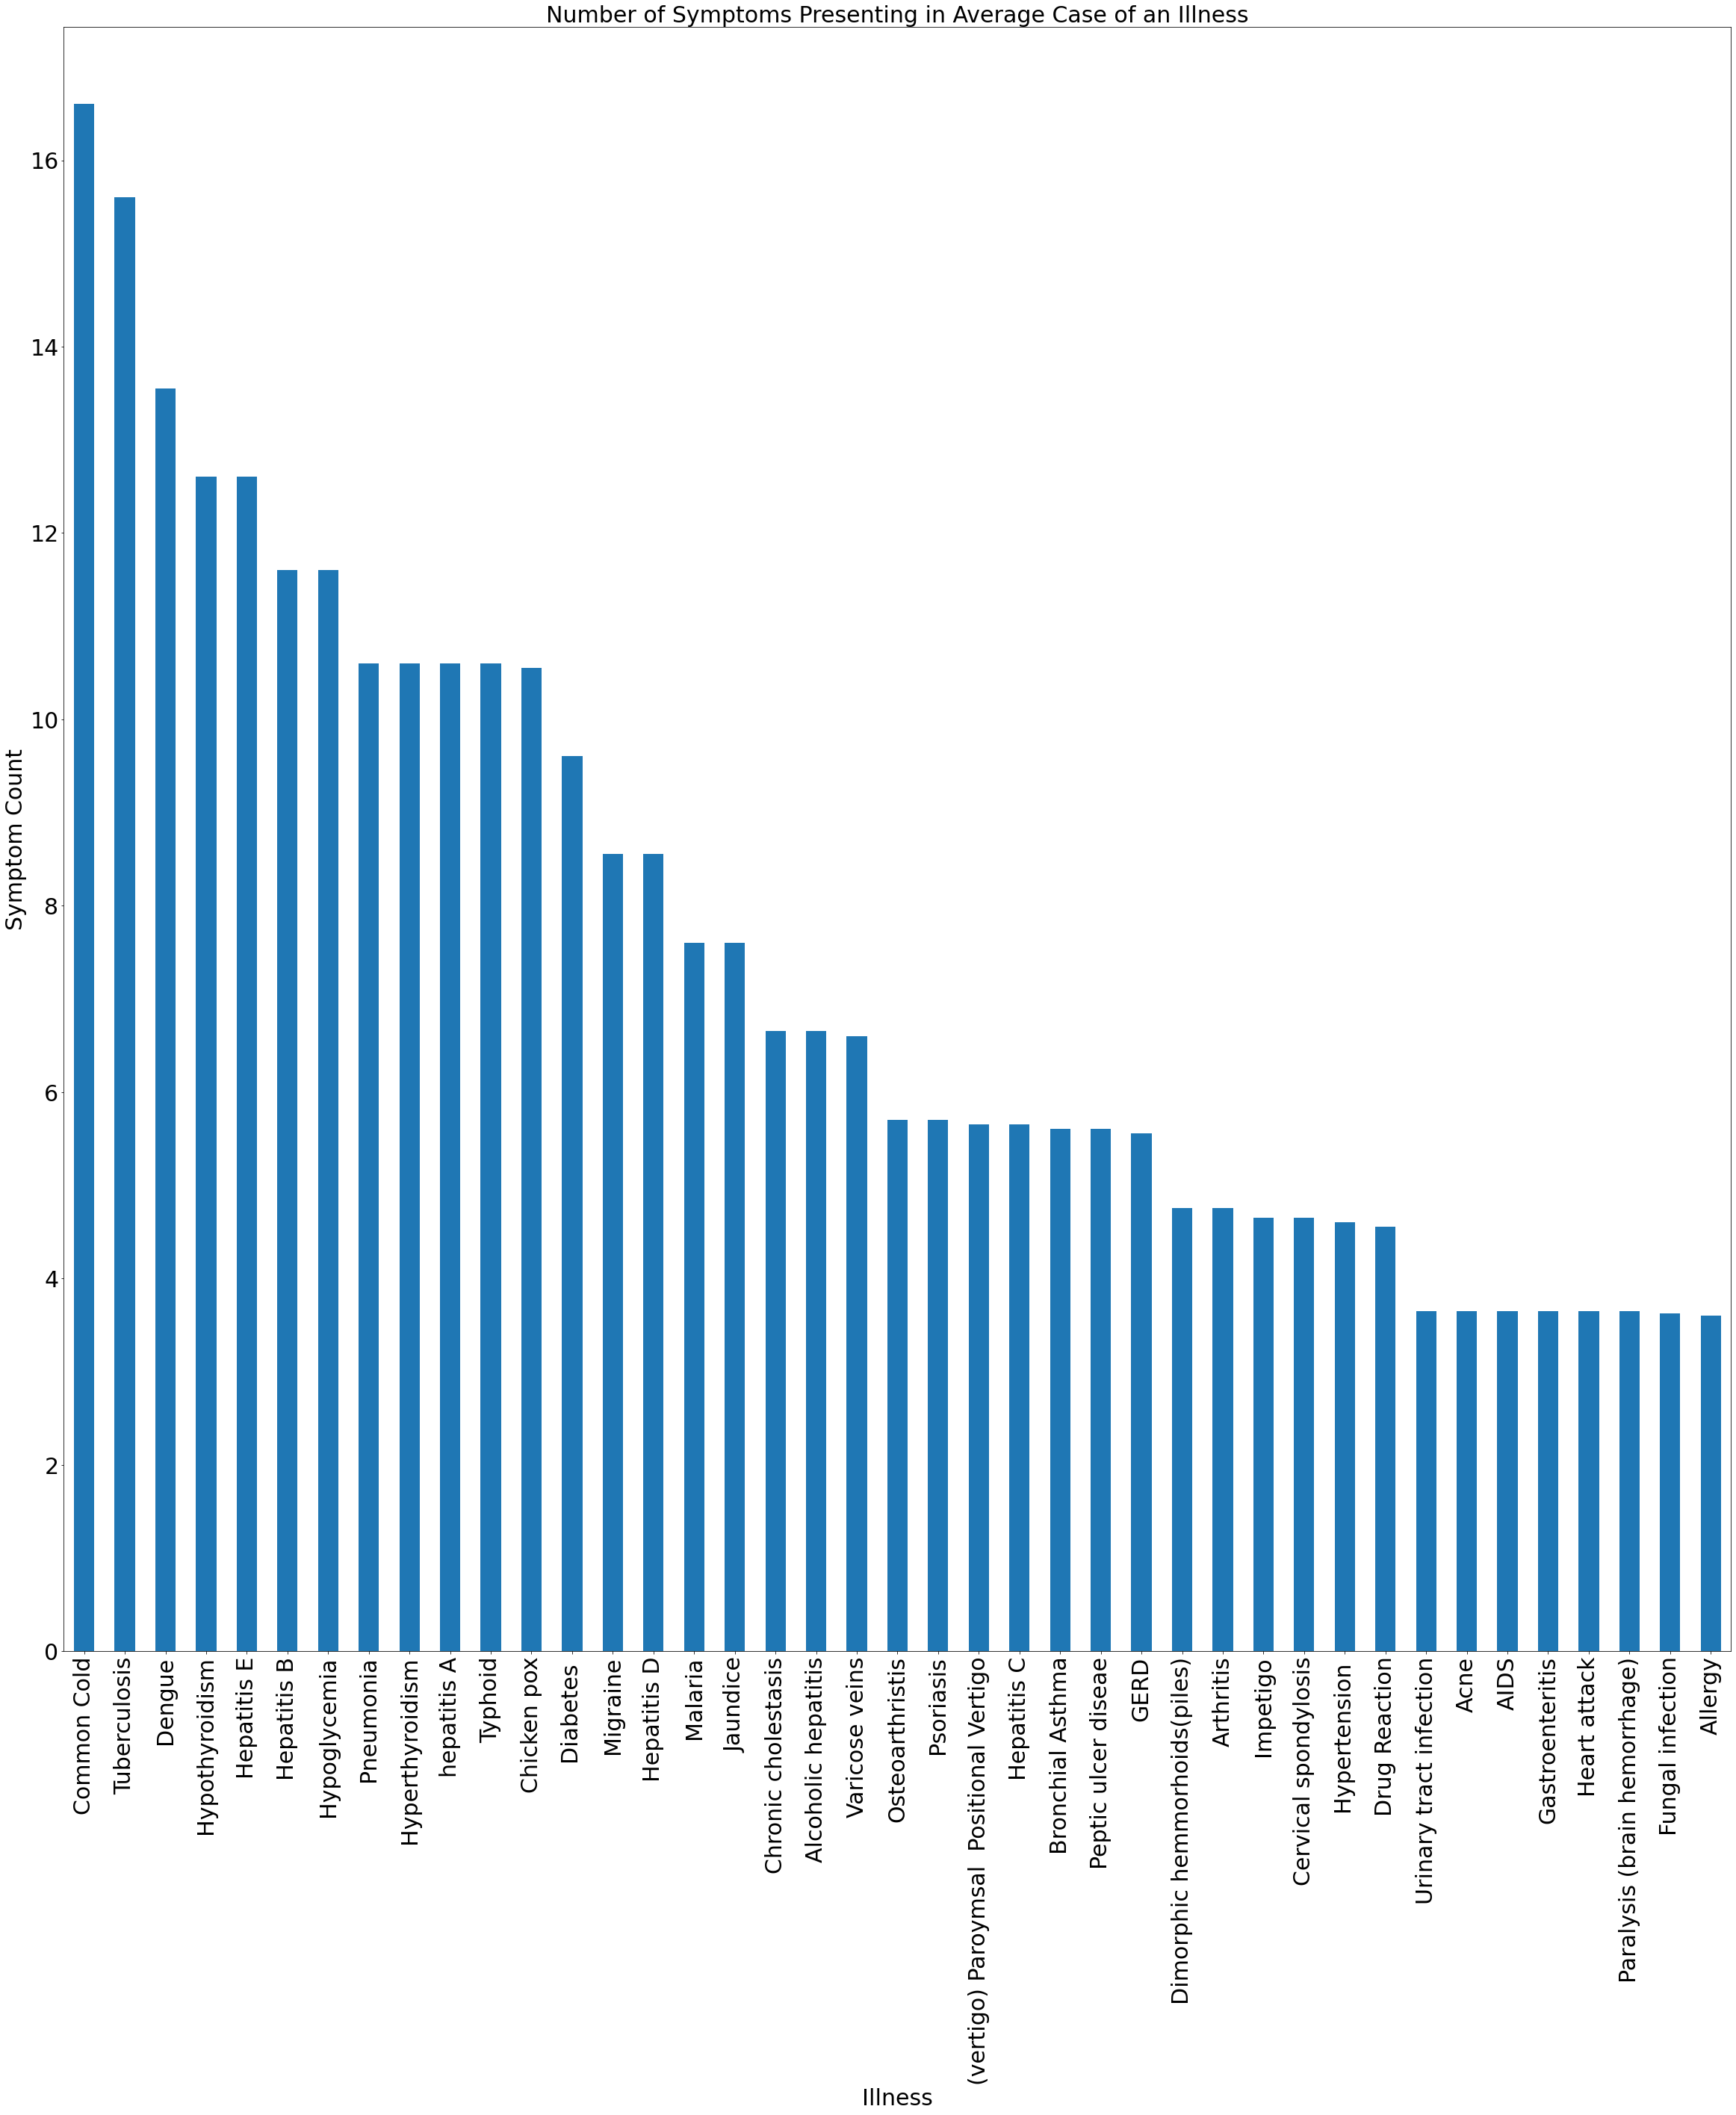

In [70]:
symps_per_ill.plot.bar(legend = False, figsize = (40, 40))
plt.rc('xtick', labelsize = 30)
plt.rc('ytick', labelsize = 30)
plt.rc('axes', labelsize = 30)
plt.rc('axes', titlesize = 30)
plt.rc('font', size = 30)
plt.title('Number of Symptoms Presenting in Average Case of an Illness')
plt.ylabel('Symptom Count')
plt.xlabel('Illness')
#plt.savefig('desktop/symptom_freq.png')
plt.show()